In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Concatenate , Add, Dot, Activation
from tensorflow.keras.models import Model


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from sa_decomp_layer import SADecompLayer

from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

%matplotlib inline
%load_ext autoreload
%autoreload 2

Num GPUs Available:  1
2.9.1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


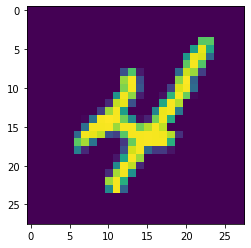

In [33]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, -1)
x = x_train[9].reshape(1, 28,28,1)
plt.imshow(x[0])


In [88]:
def rotateDataset(x,y, maxRot = 360, h=28, w=28, batch_size=100):
    datagen = ImageDataGenerator(rotation_range=maxRot)
    # fit the generator
    datagen.fit(x.reshape(x.shape[0], h, w, 1))
    out = datagen.flow(x.reshape(x.shape[0], h, w, 1), y.reshape(y.shape[0], -1), batch_size=batch_size)


    return  out

Input shape :  (1, 28, 28, 1)
k 28
PS :  (1, 28, 28, 1)


'model = Model(inputs = input_net, outputs = s)\nmodel.summary()\nmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])'

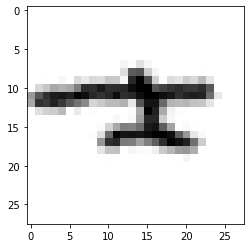

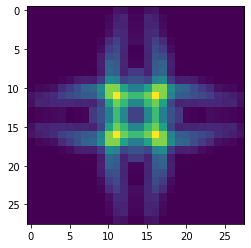

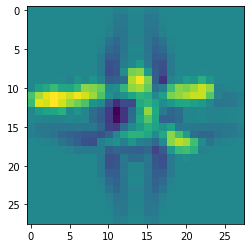

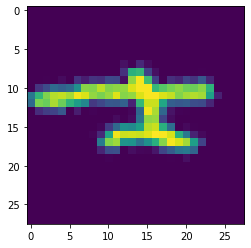

In [116]:
for X,Y in rotateDataset(np.array([x_train[9]]),np.array([None]), batch_size=1, maxRot=360):


    plt.figure(0)  
    plt.imshow(X.reshape(28,28), cmap='gray_r')  
    plt.figure(1)  
    s, a = SADecompLayer(w_size=28)(X)
    plt.imshow(s[0,:,:,0])   
    plt.figure(2)  
    plt.imshow(a[0,:,:,0])   
    plt.figure(3)  
    plt.imshow(s[0,:,:,0]+a[0,:,:,0])       
    break


'''model = Model(inputs = input_net, outputs = s)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])'''




In [179]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions

model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

#model.summary()

In [180]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.ndimage import rotate

#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

def load_img(img_path,img_shape, preprocess=True, angle=0):
    
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    #num_channel=img_shape[2]


    img = image.load_img(img_path , target_size=(img_rows, img_cols))    
    img = rotate(img, angle, reshape=False)
    if preprocess:
        img = image.img_to_array(img) 
        img = np.expand_dims(img, axis=0)

        img =  preprocess_input(img)
        return img

    #data = np.array(data)
    #data = data.astype('float32')
    #data /= 255
    #labels=np.array(labels)
    #print('data shape',data.shape)
    #print('labels shape',labels.shape)
    return np.array(img)

(1, 224, 224, 3)
1/1 [==============================] - 0s 98ms/step
(1, 7, 7, 512)


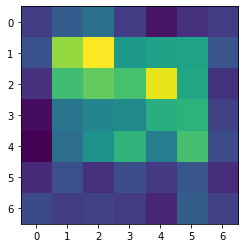

In [184]:
img  = load_img('../images/test_piano.jpg', angle=65, img_shape=(224,224))
print(img.shape)
yhat = model.predict(img)
print(yhat.shape)
plt.imshow(np.mean(yhat, axis=3)[0])